# Titanic Survival Analysis

Starter notebook for exploring the Kaggle Titanic dataset.

Planned sections:
- Load data
- Clean and preprocess
- Exploratory data analysis (EDA)
- Simple baseline model
- Results and next steps


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

%matplotlib inline
sns.set(style="whitegrid")

data_path = "data/titanic_train.csv"

df = pd.read_csv(data_path)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


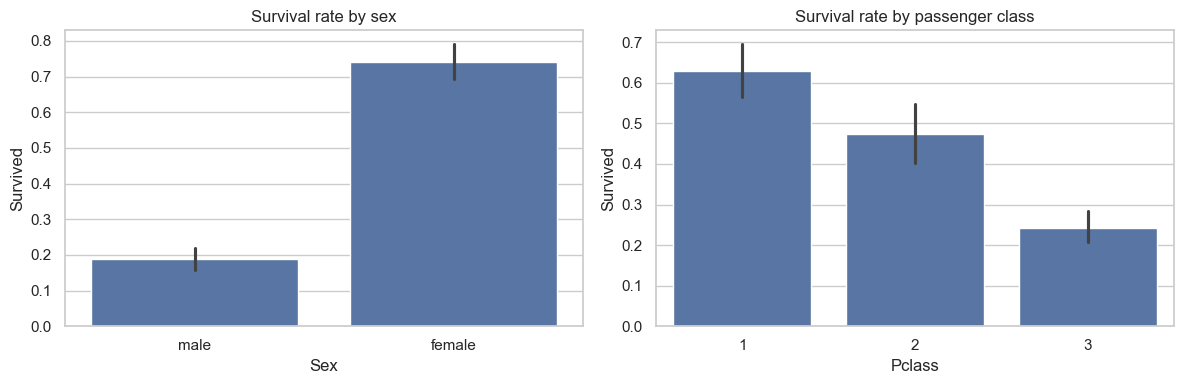

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(
    data=df,
    x="Sex",
    y="Survived",
    ax=axes[0],
)
axes[0].set_title("Survival rate by sex")

sns.barplot(
    data=df,
    x="Pclass",
    y="Survived",
    ax=axes[1],
)
axes[1].set_title("Survival rate by passenger class")

plt.tight_layout()
plt.show()


In [3]:
# Work on a copy
data = df.copy()

# Features we'll use
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = "Survived"

data = data[features + [target]]

# Handle missing values
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

# Drop any remaining rows with NA in selected columns
data = data.dropna(subset=features + [target])

# One-hot encode categoricals
data_encoded = pd.get_dummies(
    data,
    columns=["Sex", "Embarked"],
    drop_first=True,
)

X = data_encoded.drop(columns=[target])
y = data_encoded[target]

X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")

print("Classification report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.804

Classification report:

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



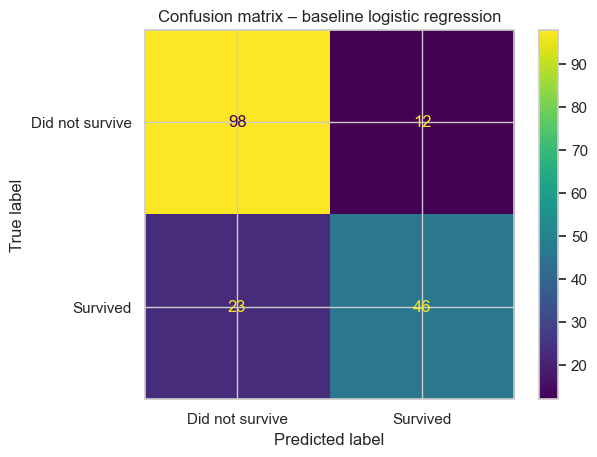

In [5]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=["Did not survive", "Survived"],
)
disp.ax_.set_title("Confusion matrix – baseline logistic regression")
plt.show()


### Results & next steps

This baseline logistic regression model uses a small set of features  
(`Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`) and reaches
about **80% accuracy** on the test split.

From the EDA and confusion matrix:

- Survival is much higher for some combinations of sex and class, which matches intuition about lifeboat priority.
- The model is noticeably better at identifying passengers who did not survive (high recall for the non-survivor class), while it misses a larger fraction of actual survivors.

If I were extending this, my next steps would be:

- Extract additional features (e.g. titles from names, family size).
- Try tree-based models (e.g. random forest, gradient boosting) and compare.
- Use cross-validation instead of a single train/test split to better estimate performance.
